In [1]:
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from matplotlib import pyplot as plt
import os


/Users/noa/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [96]:
def generate_program_refs(program):
    return {
        'model_performance': pd.read_csv(f"/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/{program}/final_model_performance.tsv",sep='\t'),
        'all_models_performance': pd.read_csv(f"/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/{program}/all_models_performance.tsv",sep='\t'),
        'feature_importance': pd.read_csv(f"/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/{program}/final_model/full_model/model_standard_vi.tsv",sep='\t'),
        'test_data': pd.read_csv(f"/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/{program}/final_model/test.tsv",sep='\t'), 
    'val_upgrade_data': pd.read_csv(f"/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/{program}/final_model/val_upgrade.tsv",sep='\t'), 
     'val_downgrade_data': pd.read_csv(f"/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/{program}/final_model/val_downgrade.tsv",sep='\t'),
     'val_standard_data': pd.read_csv(f"/Users/noa/Workspace/bootstrap_results/remote_results/ML_results/{program}/final_model/val_standard.tsv",sep='\t')
     
    }


iqtree_refs = generate_program_refs("iqtree")
raxml_refs = generate_program_refs("raxml")
fasttree_refs = generate_program_refs("fasttree")


In [8]:
def calibration_plot(pred_dict,true,fig = None,ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    for name in pred_dict:
        pred = pred_dict[name]
        true_calibrated, pred_calibrated = calibration_curve(true, pred, n_bins=15)
        # plot perfectly calibrated
        # plot model reliabilities
        ax.plot(true_calibrated, pred_calibrated, marker='.', label = name)
    ax.plot([0, 1], [0, 1], linestyle='--', color='black')
    #ax.set_xlabel('True probabilities')
    #ax.set_ylabel('Predicted probabilities')
    fig.text(0.5, 0.04, 'Observation', ha='center', va='center')
    fig.text(0.06, 0.5, 'Prediction', ha='center', va='center', rotation='vertical')
    #ax.legend(bbox_to_anchor=(0,0))
    #ax.legend()
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
    ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
    
def programs_calibration_plot(iqtree_data,raxml_data,fasttree_data):  
    fig,axs = plt.subplots(ncols=1, nrows=3 )
    calibration_plot({'IQTREE ML model':iqtree_data['predictions_full_standard'],
    'IQTREE aLRT test':iqtree_data['predictions_feature_aLRT_iqtree_support_raw_boot'],
                  'IQTREE Ultrafast':iqtree_data['predictions_bootstrap_support_raw_boot'],
                 'IQTREE aBayes test':iqtree_data['predictions_feature_aBayes_iqtree_support_raw_boot'],
                 }, iqtree_data["true_binary_support"],fig,axs[0])


    calibration_plot({
                  'RAxML ML model':raxml_data['predictions_full_standard'],
    'RAxML bootstrap':raxml_data['predictions_bootstrap_support_raw_boot'],
                 }, raxml_data["true_binary_support"],fig,axs[1])


    calibration_plot({
                  'Fasttree ML model':fasttree_data['predictions_full_standard'],
    'Fasttree SH test':fasttree_data['predictions_bootstrap_support_raw_boot'],
                 }, fasttree_data["true_binary_support"],fig,axs[2])


    plt.show()
    
    


In [50]:
#print(raxml_refs["val_upgrade_data"].columns)
import numpy as np
np.max(iqtree_refs["val_upgrade_data"]['bootstrap_support'])

0.01

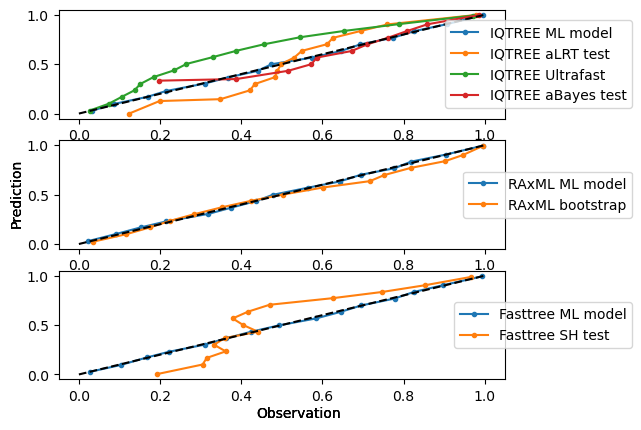

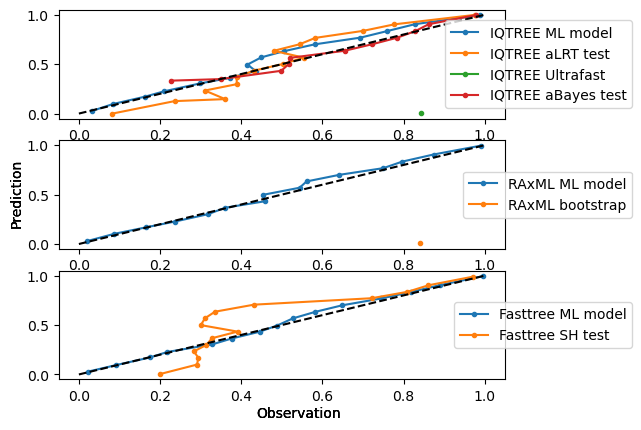

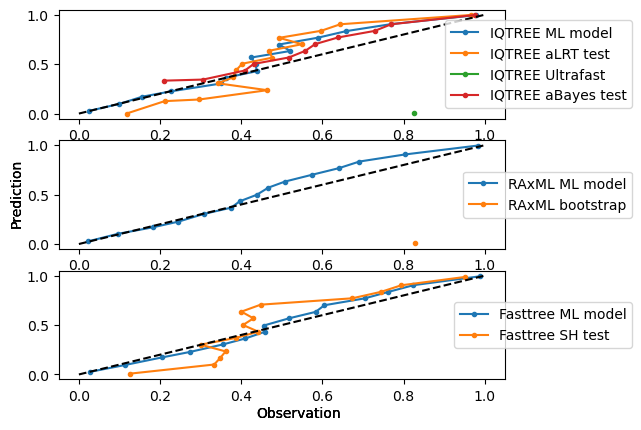

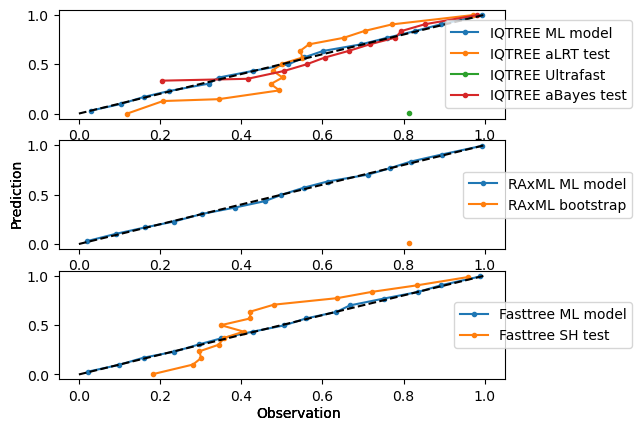

In [51]:
programs_calibration_plot(iqtree_refs["test_data"],raxml_refs["test_data"],fasttree_refs["test_data"])
programs_calibration_plot(iqtree_refs["val_upgrade_data"],raxml_refs["val_upgrade_data"],fasttree_refs["val_upgrade_data"])
programs_calibration_plot(iqtree_refs["val_downgrade_data"],raxml_refs["val_downgrade_data"],fasttree_refs["val_downgrade_data"])
programs_calibration_plot(iqtree_refs["val_standard_data"],raxml_refs["val_standard_data"],fasttree_refs["val_standard_data"])




In [14]:
from sklearn.metrics import roc_curve

def roc_comp_plot(pred_dict, true,fig = None,ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    for name in pred_dict:
        pred = pred_dict[name]
        fpr , tpr, thresholds = roc_curve(true, pred)
        ax.plot(fpr, tpr, label = name)
    ax.plot([0,1],[0,1], 'k--')

    fig.text(0.5, 0.04, 'FPR', ha='center', va='center')
    fig.text(0.06, 0.5, 'TPR', ha='center', va='center', rotation='vertical')
    #ax.legend(bbox_to_anchor=(0,0))
    #ax.legend()
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
    ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
    


def programs_roc_plots(iqtree_data,raxml_data,fasttree_data):
    fig,axs = plt.subplots(ncols=1, nrows=3 )
    roc_comp_plot({'IQTREE ML model':iqtree_data['predictions_full_standard'],
        'IQTREE aLRT test':iqtree_data['predictions_feature_aLRT_iqtree_support_raw_boot'],
                      'IQTREE Ultrafast':iqtree_data['predictions_bootstrap_support_raw_boot'],
                     'IQTREE aBayes test':iqtree_data['predictions_feature_aBayes_iqtree_support_raw_boot'],
                     }, iqtree_data["true_binary_support"],fig,axs[0])


    roc_comp_plot({
                      'RAxML ML model':raxml_data['predictions_full_standard'],
        'RAxML bootstrap':raxml_data['predictions_bootstrap_support_raw_boot'],
                     }, raxml_data["true_binary_support"],fig,axs[1])


    roc_comp_plot({
                      'Fasttree ML model':fasttree_data['predictions_full_standard'],
        'Fasttree SH test':fasttree_data['predictions_bootstrap_support_raw_boot'],
                     }, fasttree_data["true_binary_support"],fig,axs[2])

    plt.show()

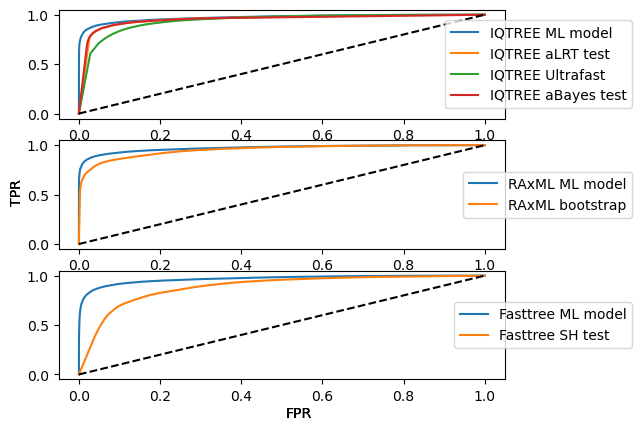

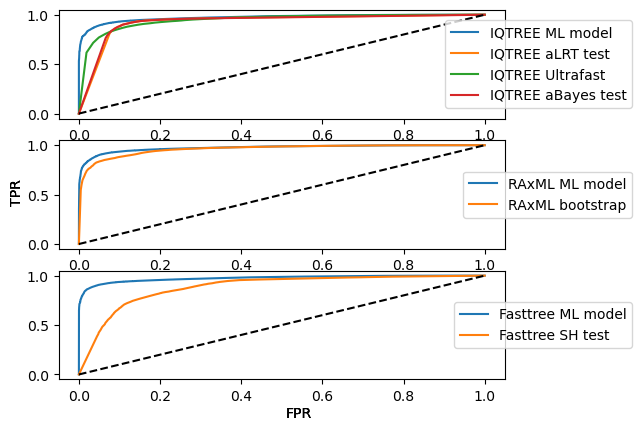

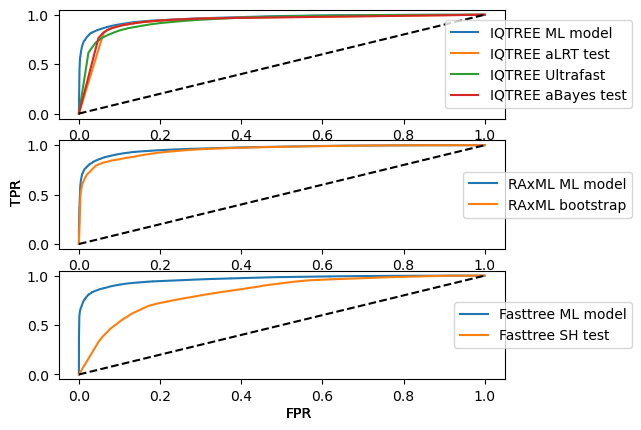

In [26]:
programs_roc_plots(iqtree_test_data,raxml_test_data,fasttree_test_data)
programs_roc_plots(iqtree_val_upgrade_data,raxml_val_upgrade_data,fasttree_val_upgrade_data)
programs_roc_plots(iqtree_val_downgrade_data,raxml_val_downgrade_data,fasttree_val_downgrade_data)

In [38]:
iqtree_translation_dict = {'full_standard-model_standard': 'All features','fast_standard-model_standard':'All features except NNI features',
                   'bootstrap_support-raw_only_boot':'Raw ultrafast bootstrap support','bootstrap_support-only_boot':'Calibrated ultrafast bootstrap support',
                    'bootstrap_support-inc_boot':'All features+ ultrafast bootstrap support','feature_aLRT_iqtree_support-raw_only_boot': 'Raw aLRT support',
                    'feature_aLRT_iqtree_support-only_boot':"Calibrated aLRT support",'feature_aLRT_iqtree_support-inc_boot':"All features+ aLRT support",
                    'feature_aBayes_iqtree_support-raw_only_boot': 'Raw aBayes support',
                    'feature_aBayes_iqtree_support-only_boot':"Calibrated aaBayes support",'feature_aBayes_iqtree_support-inc_boot':"All features+ aBayes support"
                    
            
                   }

iqtree_translation_dict = {'full_standard-model_standard': 'All features','fast_standard-model_standard':'All features except NNI features',
                   'bootstrap_support-raw_only_boot':'Raw ultrafast bootstrap support','bootstrap_support-only_boot':'Calibrated ultrafast bootstrap support',
                    'bootstrap_support-inc_boot':'All features+ ultrafast bootstrap support','feature_aLRT_iqtree_support-raw_only_boot': 'Raw aLRT support',
                    'feature_aLRT_iqtree_support-only_boot':"Calibrated aLRT support",'feature_aLRT_iqtree_support-inc_boot':"All features+ aLRT support",
                    'feature_aBayes_iqtree_support-raw_only_boot': 'Raw aBayes support',
                    'feature_aBayes_iqtree_support-only_boot':"Calibrated aaBayes support",'feature_aBayes_iqtree_support-inc_boot':"All features+ aBayes support"
                    
            
                   }

raxml_translation_dict = {'full_standard-model_standard': 'All features','fast_standard-model_standard':'All features except NNI features',
                   'bootstrap_support-raw_only_boot':'Raw ultrafast bootstrap support','bootstrap_support-only_boot':'Calibrated ultrafast bootstrap support',
                    'bootstrap_support-inc_boot':'All features + ultrafast bootstrap support',           
                   }
fasttree_translation_dict = {'full_standard-model_standard': 'All features','fast_standard-model_standard':'All features except NNI features',
                   'bootstrap_support-raw_only_boot':'Raw SH support','bootstrap_support-only_boot':'Calibrated SH support',
                    'bootstrap_support-inc_boot':'All features + SH support',           
                   }
translate_datasets = {'val_upgrade':'Validation-JTT -> GTR+F+I+G',
                     'val_downgrade':'Validation-GTR+F+I+G -> JTT',
                      'val_standard':'Validation-control',
                      'test':'Test',
                      'train':'Train'
                     }
    

def edit_performance(models_performance_data, translation_dict, out_path):
    models_performance_data["concatenated_model"] = models_performance_data['analysis_type'].astype(str) +"-"+ models_performance_data["name"]
    models_performance_data["description"] = models_performance_data["concatenated_model"].apply(lambda x: translation_dict[x])
    models_performance_data["FPR"] = models_performance_data["fp_0.5"]/(models_performance_data["tn_0.5"]+models_performance_data["fp_0.5"])
    models_performance_data["FNR"] = models_performance_data["fn_0.5"]/(models_performance_data["tp_0.5"]+models_performance_data["fn_0.5"])
    models_performance_data["dataset"] = models_performance_data["dataset"].apply(lambda x: translate_datasets[x])
    out_df = models_performance_data[["description","dataset","AUC","logloss","brier_loss","mcc_0.5","FPR","FNR"]]
    out_df.to_csv(out_path,sep='\t')



In [40]:
main_results_path = '/Users/noa/Workspace/bootstrap_results/remote_results/ML_results'
edit_performance(iqtree_refs['model_performance'], iqtree_translation_dict, out_path = os.path.join(main_results_path,"iqtree/performance_text.tsv"))
edit_performance(fasttree_refs['model_performance'], fasttree_translation_dict, out_path = os.path.join(main_results_path,"fasttree/performance_text.tsv"))
edit_performance(raxml_refs['model_performance'], raxml_translation_dict, out_path = os.path.join(main_results_path,"raxml/performance_text.tsv"))

In [86]:
fasttree_refs['model_performance']

,Unnamed: 0,tn_0.5,fp_0.5,fn_0.5,tp_0.5,mcc_0.5,tn_0.95,fp_0.95,fn_0.95,tp_0.95,mcc_0.95,AUC,brier_loss,logloss,average_precision,dataset,name,metric_type,analysis_type,sample_frac
0,0,128012.0,7406.0,5698.0,24135.0,0.738276,108234.0,27184.0,543.0,29290.0,0.633398,0.965838,0.056189,0.178980,0.992503,test,model_standard,all_data,full_standard,-1
1,1,307319.0,17036.0,12940.0,59098.0,0.751670,259574.0,64781.0,835.0,71203.0,0.640654,0.970560,0.052855,0.167468,0.993573,train,model_standard,all_data,full_standard,-1
2,2,42562.0,2372.0,1966.0,7175.0,0.719658,37841.0,7093.0,355.0,8786.0,0.661070,0.963690,0.056851,0.182166,0.992532,val_downgrade,model_standard,all_data,full_standard,-1
3,3,33628.0,2146.0,1999.0,6992.0,0.713350,27246.0,8528.0,250.0,8741.0,0.603952,0.956111,0.065710,0.210772,0.988740,val_standard,model_standard,all_data,full_standard,-1
4,4,42259.0,2154.0,1384.0,6885.0,0.756574,37609.0,6804.0,157.0,8112.0,0.668403,0.973265,0.047036,0.149471,0.995091,val_upgrade,model_standard,all_data,full_standard,-1
5,0,128414.0,7004.0,7114.0,22719.0,0.710841,103435.0,31983.0,610.0,29223.0,0.592087,0.960001,0.060438,0.193337,0.991065,test,model_standard,all_data,fast_standard,-1
6,1,308952.0,15403.0,15700.0,56338.0,0.735754,249574.0,74781.0,542.0,71496.0,0.608897,0.968828,0.054784,0.173686,0.993162,train,model_standard,all_data,fast_standard,-1
7,2,42607.0,2327.0,1970.0,7171.0,0.721671,34886.0,10048.0,175.0,8966.0,0.594386,0.963504,0.056243,0.179617,0.992490,val_downgrade,model_standard,all_data,fast_standard,-1
8,3,33767.0,2007.0,2493.0,6498.0,0.680793,25870.0,9904.0,250.0,8741.0,0.565094,0.948340,0.070948,0.227654,0.986385,val_standard,model_standard,all_data,fast_standard,-1
9,4,42216.0,2197.0,1485.0,6784.0,0.745757,35273.0,9140.0,124.0,8145.0,0.603695,0.969851,0.049502,0.159482,0.994379,val_upgrade,model_standard,all_data,fast_standard,-1


## Feature importance

In [58]:
translation_dict = {"feature_min_ll_diff_opt=True_model_False": "Minimum log-likelihood difference between an NNI neighbor near the bipartition and current tree",
 "feature_max_ll_diff_opt=True_model_False": "Maximum log-likelihood difference between an NNI neighbor near the split and current tree",
  
     "feature_min_ll_diff_opt=False_model_False": "Minimum log-likelihood difference between an NNI neighbor near the bipartition and current tree",
  "feature_max_ll_diff_opt=False_model_False": "Maximum log-likelihood difference between an NNI neighbor near the split and current tree",
  
  'feature_mean_parsimony_trees_binary':"Fraction of parsimoy trees in which the bipartition exists",
  'feature_mean_parsimony_trees_neighbors_binary':"Fraction of parsimony trees in which the neighbouring bipartitions exist",
  
  
   'feature_mean_all_ML_boot_raxml_neighbors_binary':'Fraction of final ML trees in which the bipartition exists',
  
   'feature_mean_all_ML_boot_raxml_binary':"Fraction of parsimony trees in which the neighbouring bipartitions exist",

  
'feature_mean_parsimony_trees':"Mean transfer distance of the bipartition across parsimoy trees",
'feature_mean_parsimony_trees_neighbors':"Mean transfer distance of the neighbouring bipartitions across parsimoy trees",


'feature_mean_all_ML_boot_raxml':'Mean transfer distance of the bipartition across final ML trees',
'feature_mean_all_ML_boot_raxml_neighbors':'Mean transfer distance of the neighbouring bipartitions across final ML trees',

'feature_partition_branch':'Branch length at the parititon',
'feature_partition_branch_vs_mean':'Branch length at the parititon divided by total tree divergence',
'feature_var_bl':'Variance of branch lengths across the tree',
'feature_25_pct_bl':'25th percentile of tree branch lengths',
'feature_75_pct_bl':'75th percentile of tree branch lengths',
'feature_mean_bl':'Average of tree branch length',


'feature_partition_divergence':'Total divergence in the smaller subtree defined by the bipartition',
'feature_divergence_ratio':'Total divergence in the smaller subtree defined by the bipartition divided by total tree divergence',
'feature_partition_size':'Number of leaves in the smaller subtree defined by the bipartition',
'feature_partition_size_ratio':'Fraction of leaves in the smaller subtree defined by the bipartition',

'feature_min_neighbor_brlen':'Minimal branch length among the neighbouring branches',
'feature_mean_neighbor_brlen':'Mean branch length among the neighbouring branches',
'feature_msa_constant_sites_pct':'Fraction of constant sites among the MSA sites',
'feature_msa_n_loci':'Number of positions in the MSA',
'feature_msa_n_unique_sites':'Number of unique positions in the MSA',
'feature_msa_n_seq':'Number of sequences in the MSA',
'feature_msa_pypythia_msa_difficulty':'MSA difficulty',
'feature_max_mean_branch_length_opt=True_model_False':'Difference in branch lengths'}

In [100]:
main_results_path = '/Users/noa/Workspace/bootstrap_results/remote_results/ML_results'
iqtree_vi = iqtree_refs['feature_importance'].copy()
iqtree_vi['description'] = iqtree_vi['Unnamed: 0'].map(translation_dict)
iqtree_vi['Gini-importance'] = iqtree_vi['Gini-importance'].apply(lambda x: round(x))
iqtree_vi['Gini-importance'] = iqtree_vi.apply(lambda x: "{:,}".format(x['Gini-importance']), axis=1)
iqtree_vi = iqtree_vi.round(2)
iqtree_vi[["description","Gini-importance","auc","mcc"]].sort_values('Gini-importance', ascending=False).to_csv(os.path.join(main_results_path,'iqtree/vi_text.tsv'), sep='\t')
###
raxml_vi = raxml_refs['feature_importance'].copy()
raxml_vi['description'] = raxml_vi['Unnamed: 0'].map(translation_dict)
raxml_vi['Gini-importance'] = raxml_vi['Gini-importance'].apply(lambda x: round(x))
raxml_vi['Gini-importance'] = raxml_vi.apply(lambda x: "{:,}".format(x['Gini-importance']), axis=1)
raxml_vi = raxml_vi.round(2)
raxml_vi[["description","Gini-importance","auc","mcc"]].sort_values('Gini-importance', ascending=False).to_csv(os.path.join(main_results_path,'raxml/vi_text.tsv'), sep='\t')
###
fasttree_vi = fasttree_refs['feature_importance'].copy()
fasttree_vi['description'] = fasttree_vi['Unnamed: 0'].map(translation_dict)
fasttree_vi['Gini-importance'] = fasttree_vi['Gini-importance'].apply(lambda x: round(x))
fasttree_vi['Gini-importance'] = fasttree_vi.apply(lambda x: "{:,}".format(x['Gini-importance']), axis=1)
fasttree_vi = fasttree_vi.round(2)
fasttree_vi[["description","Gini-importance","auc","mcc"]].sort_values('Gini-importance', ascending=False).to_csv(os.path.join(main_results_path,'fasttree/vi_text.tsv'), sep='\t')

### Running time analysis

In [101]:
#iqtree_refs["test_data"][['extraction_of_features_time','total_neig_ll_evaluation_time_opt']]


In [102]:
#iqtree_refs["test_data"][["predictions_full_standard","true_binary_support","feature_msa_pypythia_msa_difficulty","feature_msa_n_loci","feature_msa_n_seq"]]

#iqtree_refs

,predictions_full_standard,true_binary_support,feature_msa_pypythia_msa_difficulty,feature_msa_n_loci,feature_msa_n_seq
0,0.961955,True,0.617714,7296.0,76.0
1,0.999255,True,0.617714,7296.0,76.0
2,0.999781,True,0.617714,7296.0,76.0
3,0.223218,False,0.617714,7296.0,76.0
4,0.940021,True,0.617714,7296.0,76.0
...,...,...,...,...,...
165246,0.999746,True,0.039216,3234.0,40.0
165247,0.999624,True,0.039216,3234.0,40.0
165248,0.999005,True,0.039216,3234.0,40.0
165249,0.999746,True,0.039216,3234.0,40.0
